# Biodiversité des parcs nationaux américains

# Introduction

L'objectif de ce projet est d'étudier la biodiversité au sein de parcs nationaux. Pour cela nous utiliserons des données pour plusieurs espèces observées dans différents lieux. Les données sont produites par le National Parks Service.

En science des données vous devrez préparer les données, les analyser (statistiquement) et produire des figures pertinentes dans l'objectif de répondre à différentes questions.

**Sources:**

Les fichiers `Observations.csv` et `Species_info.csv` ont été récupérés sur [Kaggle](https://www.kaggle.com/code/karthikbhandary2/biodiversity-analysis/notebook).

Remarques: Les données pour ce projet sont inventées bien qu'*inspirées* par des données réelles.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline	

### Objectifs du projet

Vous êtes une ou un analyste de la biodiversité pour le Service des parcs nationaux. Le National Park Service veut assurer la survie des espèces en péril et maintenir le niveau de biodiversité au sein de leurs parcs. Par conséquent, vos principaux objectifs seront de comprendre les caractéristiques des espèces et leur état de conservation, ainsi que ces espèces et leurs relations avec les parcs nationaux. Quelques questions qui se posent :

- Quelle est la répartition des statuts de conservation des espèces ?
- Certains types d'espèces sont-ils plus susceptibles d'être menacés ?
- Les différences entre les espèces et leur statut de conservation sont-elles significatives ?
- Quel animal est le plus répandu et quelle est sa répartition dans les parcs ?

### Chargement des données

Ce TP contient deux ensembles de données. Le premier fichier `csv` (*comma separated values*) contient des informations sur chaque espèce et un autre contient des observations d'espèces avec des emplacements de parc. Ces données seront utilisées pour analyser répondre aux questions ci-dessus.

### Analyse des données

Des statistiques descriptives et des techniques de visualisation des données seront utilisées pour mieux comprendre les données. L'inférence statistique sera également utilisée pour tester si les valeurs observées sont statistiquement significatives. Certaines des mesures clés qui seront calculées incluent :

1. Distributions
1. comptage
1. relation entre les espèces
1. état de conservation des espèces
1. observations d'espèces dans les parcs.

### Évaluation/Conclusion

Enfin, nous reviendrons aux questions posées. A-t-on pu répondre à toutes les questions? Peut-on aller plus loin ? Nous réfléchirons aux limites/verrons si l'une des analyses aurait pu être effectuée à l'aide de méthodes différentes.


# Chargement des données

Téléchargez les fichiers `observations.csv` et `species_info.csv` sur e-campus et mettez-les sur votre jupyter. 

Chargez les fichiers sous forme de tables (`dataframes`) appelées `species` et `observations` pour `species_info.csv` et `observations.csv` respectivement.

La fonction `.head()` permet d'avoir un apercu du contenu de chaque table.

In [2]:
# VOTRE CODE ICI
species = pd.read_csv("species_info.csv")
observations = pd.read_csv("observations.csv")

In [3]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [4]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


#### Caractéristiques des jeux de données

Quelles sont les dimensions des jeux de données ? *Répondez en écrivant une phrase complète et en explicitant le nombre de lignes et de colonnes. N'hésitez pas à ajouter des cellules dans ce notebook.*

<span style="color:silver">
Dimensions de species :

In [5]:
print(species.shape)

(5824, 4)


<span style="color:silver">
Dimensions d'observations :

In [6]:
print(observations.shape)


(23296, 3)


<span style="color:green">
Pour faciliter la correction, rédigez vos réponses en vert à l'aide du conteneur HTML `span style="color:green` utilisé comme dans cette cellule.

<span style="color:silver">
Pour faciliter la visibilité et ne pas vous obliger à lire toutes les démarches, j'ai choisi la couleur silver pour démarquer les cellules concernées des réponses.

<span style="color:green">
Il y a 5824 lignes et 4 colonnes pour species.  
    
Il y a 23296 lignes et 3 colonnes pour observations.

Il est temps d'explorer un peu plus en profondeur la table `species`. Répondez aux questions suivantes :

- Combien y a-t-il d'espèces différentes ? Ce nombre est-il égal aux nombre de lignes ? Pourquoi ?

<span style="color:silver"><span style="color:silver">
On est censés retrouver autant de lignes que d'espèces car en théorie scientific_name est une clé.

In [7]:
# n'oubliez pas de mettre le code et de rédiger vos réponses. 
# Ajoutez des cellules de code ou de markdown à l'aide de la barre d'outils au dessus du notebook

species_name = species['scientific_name']
nb_species = len(species_name.unique())
print("NOMBRE D'ESPECES DIFERENTES : ")
print(nb_species)

NOMBRE D'ESPECES DIFERENTES : 
5541


<span style="color:silver">
On remarque moins d'espèces différentes que de ligne, cherchons pourquoi.
(Peut-être une erreur comme on en a parlé).

In [8]:
nb_species_dup = species[species_name.duplicated()]
nb_species_dup.head()

,category,scientific_name,common_names,conservation_status
3017,Mammal,Cervus elaphus,Rocky Mountain Elk,NaN
3019,Mammal,Odocoileus virginianus,"White-Tailed Deer, White-Tailed Deer",NaN
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
3022,Mammal,Puma concolor,"Cougar, Mountain Lion, Puma",NaN
3025,Mammal,Lutra canadensis,River Otter,NaN


<span style="color:silver">
On retrouve Cervus elaphus à une nouvelle ligne et avec un common_name différent, on en déduit qu'une espèce peut avoir différents common_names dans le jeu de données. Regardons une autre espèce pour voir s'il peut y avoir une autre raison.

In [9]:
species[species["scientific_name"]=="Canis lupus"]

,category,scientific_name,common_names,conservation_status
8,Mammal,Canis lupus,Gray Wolf,Endangered
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered


<span style="color:silver">
On remarque que le common_names varie également mais qu'il peut y avoir différents statuts pour une même espèce.

<span style="color:green"><span style="color:green">
Pourquoi retrouve-t-on moins d'espèces différentes que de lignes ? :  
    -Certaines espèces peuvent avoir un common_name qui diffère, ce qui fait qu'on retrouve des redondances. ex : Wapiti.  
    -Certaines peuvent également avoir différents statuts de conservation. ex : Loup.  

<span style="color:green">
-1ère hypothèse : On sait que le jeu de données regroupe des données sur plusieurs parcs. On peut supposer qu'en fonction de la localisation on n'appelle pas une espèce de la même manière. De plus, les différents parcs peuvent être très éloignés ce qui peut expliquer des variations de statut de conservations.  
    
-2ème hypothèse : Le jeu de données s'est fait sur plusieurs unités de temps, ceci expliquerait particulièrement les différences de status de conservations. (Un peu tiré par les cheveux car il faudrait que le jeu de données se soit fait sur des années).

- Combien y a-t-il de catégories différentes ? A quoi cette colonne correspond-t-elle?

In [10]:
species_category = species['category']
nb_category = len(species_category.unique())
print("Nombre de catégories différentes : ", nb_category)
print(species_category.unique())

Nombre de catégories différentes :  7
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


<span style="color:green">

Il y a 7 catégories différentes qui correspondent aux classes d'êtres vivants.

- Combien y a-t-il d'espèces dans chaque catégorie ? Quelle catégorie a le plus (respectivement le moins) d'espèces ? Est-ce surprenant ? Faites une figure pour représenter ce jeu de données

*Remarque : Les Vascular Plant correspondent aux [Trachéophytes](https://fr.wikipedia.org/wiki/Tracheophyta) et regroupent les plantes à fleurs [Angiospermes](https://fr.wikipedia.org/wiki/Angiosperme). Les Nonvascular plant correspondent aux [plantes non-vasculaires](https://fr.wikipedia.org/wiki/Plante_non_vasculaire)*

<span style="color:silver">
On n'oublie pas de ne pas compter les doublons d'espèces pour un résultat plus pertinent.

In [11]:
species_cat = species.groupby('category')['scientific_name'].nunique()
print(species_cat.sort_values())

category
Reptile                78
Amphibian              79
Fish                  125
Mammal                176
Nonvascular Plant     333
Bird                  488
Vascular Plant       4262
Name: scientific_name, dtype: int64


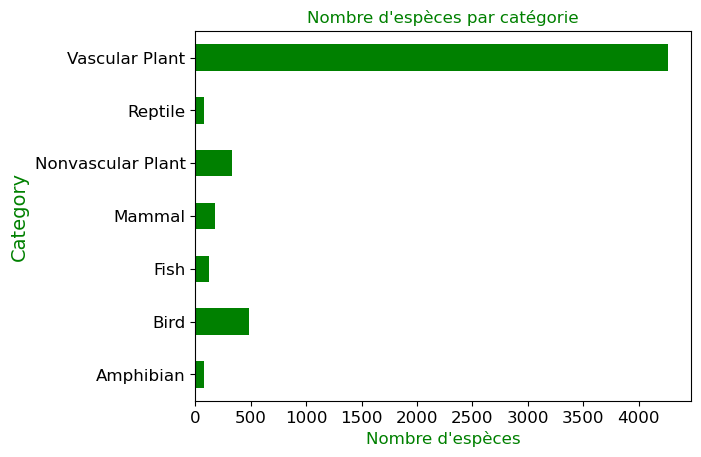

In [12]:
species_cat.plot(kind='barh', color='green', fontsize=12)
plt.title('Nombre d\'espèces par catégorie', fontsize=12, color='green')
plt.xlabel('Nombre d\'espèces', fontsize=12, color='green')
plt.ylabel('Category', fontsize=14, color='green')
plt.show()

<span style="color:green">
C'est la catégorie des Vascular Plant qui a le plus d'espèces, au vu du nombre de plantes sur notre planète ce n'est pas une surprise.  

<span style="color:green"> 
 C'est la catégorie des Reptiles qui en a le moins, je ne suis pas surpris non plus.

- Quels sont les statuts possibles de ces espèces ? Pouvez-vous les trier du moins au plus problématique pour notre problématique de conservation de la biodiversité (faites une recherche internet)?

In [13]:
species_status = species['conservation_status']
print("Les statuts possibles de ces espèces sont : " )

print(species_status.unique())


Les statuts possibles de ces espèces sont : 
[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


<span style="color:green">

LISTE DU MOINS AU PLUS PROBLÉMATIQUE: 
- In recovery 
- Species of concern 
- Threatened 
- Endangered 

- Ensuite, effectuez un décompte du nombre d'observations dans la répartition des catégories dans `conservation_status`. A votre avis, que signifie une valeur `nan` ? Faites une figure pour représenter ces données.

La colonne `conservation_status` a plusieurs valeurs possibles:
- `Species of Concern`: "Espèces préoccupantes", en déclin ou qui semblent avoir besoin d'être conservées
- `Threatened`: "Menacées" : vulnérable à une mise en danger dans un avenir proche
- `Endangered`: "En danger" : gravement menacées d'extinction
- `In Recovery`: "En rétablissement" : anciennement "Endangered", mais actuellement plus en danger d'extinction dans l'ensemble ou dans une part importante de son aire de répartition

<span style="color:silver">
Ce n'est pas pertinent de ne pas compter les doublons car en effet si une espèce a le statut de menacée dans une ligne puis en rétablissement dans
    une autre ca prendrait aléatoirement l'une des deux.

In [14]:
group_status = species.groupby('category')['conservation_status'].value_counts()
print(group_status)

category           conservation_status
Amphibian          Species of Concern      4
                   Threatened              2
                   Endangered              1
Bird               Species of Concern     72
                   Endangered              4
                   In Recovery             3
Fish               Species of Concern      4
                   Threatened              4
                   Endangered              3
Mammal             Species of Concern     28
                   Endangered              7
                   Threatened              2
                   In Recovery             1
Nonvascular Plant  Species of Concern      5
Reptile            Species of Concern      5
Vascular Plant     Species of Concern     43
                   Threatened              2
                   Endangered              1
Name: conservation_status, dtype: int64


<span style="color:green">
NaN représente une valeur manquante dans nos données. Dans notre cas ca peut-être dû à un manque d'informations ou bien que l'espèce n'ait pas de statut spécifié ici (s'il y en a trop comme les sangliers chez nous par exemple). 

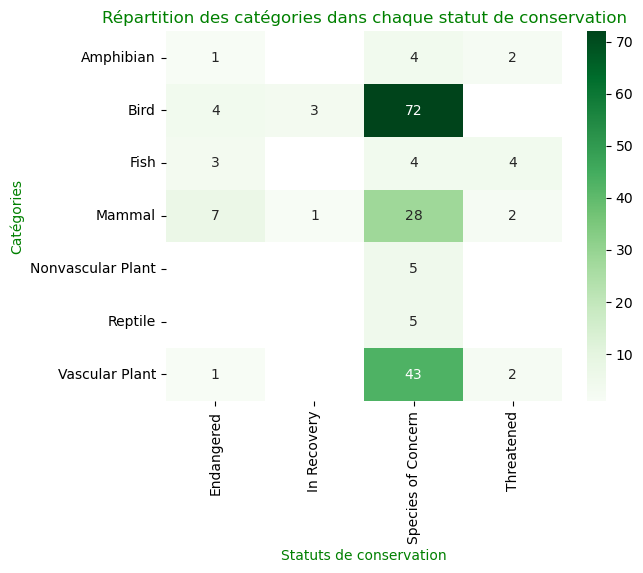

In [15]:
sns.heatmap(group_status.unstack(), annot=True, cmap= 'Greens')
plt.title("Répartition des catégories dans chaque statut de conservation", color='green')
plt.xlabel("Statuts de conservation",color="green")
plt.ylabel("Catégories", color="green")
plt.show()

#### Jeu de données `observations`

On passe à l'observation de l'autre table, `observations`.

- Combien de parcs sont étudiés ? Ou se situent-ils (faites une recherche internet) ?

In [16]:
parc = observations["park_name"].unique()
print("LES DIFFERENTS PARC NATIONAUX ET LEUR NOMBRE")
print(parc)
print(len(parc))

LES DIFFERENTS PARC NATIONAUX ET LEUR NOMBRE
['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
4


<span style="color:green">  
    
Il y a 4 parcs, tous situés aux Etats-Unis :

Great Smoky Mountains National Park :  Tennessee  
Yosemite National Park : Californie  
    Bryce National Park : Utah  
    Yellowstone National Park : Wyoming, Idaho, Montana

- Quelle est l'espèce la plus observée (et qu'est-ce que c'est ?) ? 

In [17]:
species_obs = observations.groupby('scientific_name')['observations'].sum()
print(species_obs.sort_values(ascending=False))

scientific_name
Streptopelia decaocto    1785
Holcus lanatus           1780
Castor canadensis        1725
Hypochaeris radicata     1720
Puma concolor            1711
                         ... 
Rana sierrae              144
Noturus baileyi           143
Vermivora bachmanii       141
Canis rufus               137
Grus americana            131
Name: observations, Length: 5541, dtype: int64


In [18]:
print(species_obs.idxmax())
print(species_obs.max())

Streptopelia decaocto
1785


<span style="color:silver">
Pour savoir ce que c'est on peut chercher sur Internet ou bien voir le common_name associé à cette espèce dans la table species.


In [19]:
strep = species.loc[species["scientific_name"] == "Streptopelia decaocto"]
strep.head()

,category,scientific_name,common_names,conservation_status
3077,Bird,Streptopelia decaocto,Eurasian Collared-Dove,NaN
3140,Bird,Streptopelia decaocto,"Eurasian Collared Dove, Eurasian Collared-Dove",NaN
4514,Bird,Streptopelia decaocto,Eurasian Collared Dove,NaN


<span style="color:green">
L'espèce la plus observée est la Streptopelia decaocto avec 1785 observations, c'est un oiseau appelé communément "Tourterelle turque"(Eurasian Collared-Dove).

- Dans quel parc trouve-t-on le plus d'observations ?

In [20]:
park_obs = observations.groupby('park_name')['observations'].sum()
print(park_obs.sort_values(ascending=False))

park_name
Yellowstone National Park              1443562
Yosemite National Park                  863332
Bryce National Park                     576025
Great Smoky Mountains National Park     431820
Name: observations, dtype: int64


In [21]:
print(park_obs.idxmax())
print(park_obs.max())

Yellowstone National Park
1443562


<span style="color:green">
On trouve le plus d'observations dans le Yellowstone National Park, avec au total 1 443 562 observations.

# Analyse des données

La première étape est de nettoyer et préparer les données 

- Dans la colonne `conservation_status` de la table `species`, remplacez les valeurs `nan` par `No Intervention`. En effet, `nan` signifie qu'il n'y a pas de spécification de conservation.

In [22]:
species['conservation_status'].fillna("No Intervention", inplace=True)
species.head(9)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention
1,Mammal,Bos bison,"American Bison, Bison",No Intervention
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered


- Explorez les différents statuts de conservation. Commencez par éliminer ceux sans intervention. Puis pour chaque statut, 1) comptez le nombre d'occurences des différentes `category` et 2) représentez le nombre d'espèces en fonction du statut (figure de type barplot stacked). Quel type d'être vivant est particulièrement en danger ? Commentez votre figure.

<span style="color:silver">
 0 -On élimine les lignes avec un statut sans intervention(on a besoin d'une nouvelle dataframe car ces lignes doivent être utilisées après).

In [23]:
species_wint = species[species.conservation_status != "No Intervention"]
print("Nombre de lignes sans élimination :", len(species))
print("Nombre de lignes avec élimination :", len(species_wint))
print("Reste-t-il des lignes avec No Intervention ? : ", species_wint.conservation_status.str.contains('No Intervention').any())
species_wint.head(9)

Nombre de lignes sans élimination : 5824
Nombre de lignes avec élimination : 191
Reste-t-il des lignes avec No Intervention ? :  False


,category,scientific_name,common_names,conservation_status
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern
33,Mammal,Myotis austroriparius,"Mississippi Myotis, Southeastern Myotis",Species of Concern
34,Mammal,Myotis grisescens,Gray Myotis,Endangered
35,Mammal,Myotis keenii,Keen's Myotis,Species of Concern
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern


<span style="color:silver">
1-Pour chaque statut on compte le nombre d'occurences de chaque catégories.

In [24]:
stat_cat= species_wint.groupby('conservation_status')['category'].value_counts()
print(stat_cat)

conservation_status  category         
Endangered           Mammal                7
                     Bird                  4
                     Fish                  3
                     Amphibian             1
                     Vascular Plant        1
In Recovery          Bird                  3
                     Mammal                1
Species of Concern   Bird                 72
                     Vascular Plant       43
                     Mammal               28
                     Nonvascular Plant     5
                     Reptile               5
                     Amphibian             4
                     Fish                  4
Threatened           Fish                  4
                     Amphibian             2
                     Mammal                2
                     Vascular Plant        2
Name: category, dtype: int64


<span style="color:silver">
2-Nombre d'espèces en fonction du statut de conservation.

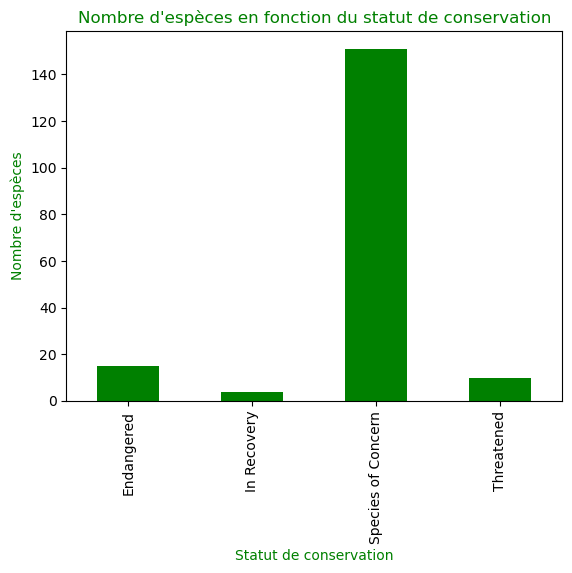

In [25]:
stat_species = species_wint.groupby('conservation_status')["scientific_name"].nunique()

stat_species.plot(kind="bar", stacked = True, color="green")
plt.xlabel("Statut de conservation", color="green")
plt.ylabel("Nombre d'espèces",color="green")
plt.title("Nombre d'espèces en fonction du statut de conservation", color="green")

plt.show()

<span style="color:green">
Commentaire de la figure : On remarque qu'il ne reste que très peu d'espèces avec un statut spécifié; Sur les 191 espèces restantes dans le jeu de données on a la quasi totalité qui sont des espèces préocupantes, c'est à dire
    des espèces qui demandent une attention particulière afin de les préserver. Sachant, que l'étape après la préocupation peut potentiellement être devenir une espèce menacée, cette figure peut montrer l'enjeu qu'on a de continuer (ou se mettre) à protéger ces espèces afin qu'elles n'aillent pas dans cette barre. De plus on sait que les espèces en rétablissement étaient anciennement en danger, on remarque que cette première à une barre trois fois plus petite que l'autre, ce qui peut montrer une difficulté quant au rétablissement. 

<span style="color:green">
Type d'être vivants en danger : On remarque que les espèces se trouvent majoritairement dans species of concern, de plus la moitié sont des oiseaux, suivis ensuite des Vascular plant, qui vu leur nombre, 
on peut consdérer ce chiffre comme insignifiant puis ensuite des mammifères. Les mammifères sont en tête des espèces en danger avec 7 espèces de mammifères sur moins de 20 au total.  
->Je dirais que ce sont les mamifères puis ensuite les oiseaux qui sont particulièrement en danger.

A l'aide des analyses précédentes, répondez à la question initiale en quelques phrases: *Quelle est la répartition des statuts de conservation des espèces ?*

<span style="color:green">
On retrouve une inégalité écrasante quant au nombre d'espèces par catégorie et le danger qui les touche. Le premier Histogramme nous montre que dans le jeu de données species
    on a plus de 75% qui sont des Vascular Plant, contre environ 3% pour les mammifères et 8% pour les oiseaux par exemple.
    Ensuite l'heatmap nous montre la répartition des catégories pour chaque statuts, on remarque que les oiseaux représentent la majorité dans les espèces préocupantes (envion 51%), suivi des Vascular Plant, puis des mammifères.
    On remarque d'ailleurs que sur une quinzaine d'espèces en danger, on a 7 mamifères.
    Le dernier histogramme nous montre que la très grande majorité des espèces sont préocupantes, et qu'il n y a qu'une petite minorité en rétablissement qui sont 3 fois moins que celles en danger (qui est l'étape précédente).  

 <span style="color:green">
 Finalement, on voit que ce ne sont pas les espèces les plus présentes qui demandent le plus d'attention, en effet 16% des oiseaux dans notre jeu de données sont des espèces préocupantes. Ces différentes figures nous montrent par le biais du grand nombre d'espèces préocupantes, la nécessité d'une surveillance accrue pour éviter qu'elles soient en danger étant donné la faible probabilité d'être ensuite en récupération. 

#### Conservation

On passe maintenant à la deuxième question : quelles sont les espèces plus susceptibles d'être suivies dans le cadre de la conservation ? 

- Créez une nouvelle colonne `is_protected` qui vaut `False` pour toute espèces étant `No Intervention` et `True``sinon.

In [26]:
species['is_protected'] = np.where(species['conservation_status'] == 'No Intervention', False, True)
species.head(9)

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True
8,Mammal,Canis lupus,Gray Wolf,Endangered,True


- Pour chaque `category` calculez la proportion d'espèces protégées. Observez les résultats.

<span style="color:silver">
En proportion (%).

In [27]:
prot_cat = species.groupby('category')["is_protected"].mean()
print((prot_cat*100).sort_values())

category
Vascular Plant        1.029083
Nonvascular Plant     1.501502
Reptile               6.329114
Fish                  8.661417
Amphibian             8.750000
Bird                 15.163148
Mammal               17.757009
Name: is_protected, dtype: float64


<span style="color:silver">
En valeur (besoin pour table de contingence)

In [28]:
prot_cat2 = species.groupby('category')["is_protected"].sum()
print(prot_cat2.sort_values())

category
Nonvascular Plant     5
Reptile               5
Amphibian             7
Fish                 11
Mammal               38
Vascular Plant       46
Bird                 79
Name: is_protected, dtype: int64


<span style="color:silver">
On remarque via le premier tableau que les espèces les plus protégées sont celles que j'ai mentionnées plus tôt sur le danger. 

#### Tests statistiques

Afin de déterminer si les différences entre les catégories sont significatives ou pas, il faut faire des tests statistiques. Vous allez éxécuter un [test du chi-2](https://fr.wikipedia.org/wiki/Test_du_%CF%87%C2%B2) qui permet de voir si différentes catégories présentent des différences statistiquement significatives dans les taux de statut de conservation. Ce test, non paramétrique, se base sur une table de contingence et compare si la répartition est homogène entre les 2 catégories. Une telle table ressemble à cela:


||protected|not protected|
|-|-|-|
|Non-vascular plant|?|?|
|Vascular plant|?|?|

Commencons par tester si les deux catégories de plantes ont des taux de conservation similaires. La table de contingence est donnée ci-dessous `contingency1`

Le calcul du X2 retourne plusieurs valeurs. La deuxième valeur est la p-value, ici 0.69 et est à comparer à la p-value standard des test de significance 0.05 (5% de la queue de distribution). Pour un rappel en statistiques, revoir le cours d'Introduction à la Science des données de Mme Guyon (L1) ou de Mr Evrard (L2).

Ici, 0.69 > 0.05 donc les plantes vasculaires ou non semblent suivre la même répartition en terme de protection.

In [29]:
from scipy.stats import chi2_contingency

#Table de contingence MPlantes non-vascaulaires versus vasculaires
contingency1 = [[5, 328],
              [46,4126]]
#Calcul du X2
chi2_contingency(contingency1)

Chi2ContingencyResult(statistic=0.15447053643010147, pvalue=0.694299244877863, dof=1, expected_freq=array([[3.76981132e+00, 3.29230189e+02],
       [4.72301887e+01, 4.12476981e+03]]))

Refaites la même analyse pour `Vascular Plant` et `Mammal`.

Commencez par la table de contingence puis faites le test en analyser les résultats.

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Vascular Plant|?|?|



<span style="color:silver">
1-Création de la table de contingences.

In [30]:
mam = species[species['category'] == 'Mammal'].drop_duplicates(subset='scientific_name')
print("Nombre de mamifères : ", mam.shape[0])
vasc = species[species['category'] == 'Vascular Plant'].drop_duplicates(subset='scientific_name')
print("Nombre de Vascular Plants : ", vasc.shape[0])

Nombre de mamifères :  176
Nombre de Vascular Plants :  4262


<span style="color:silver">
Je ne retrouve pas 4126 comme vous mais je vais continuer avec ca.

In [31]:
#Table de contingence Mammal versus vasculaire
contingency2 = [[46, 4262],
                [38, 176]]

<span style="color:silver">
2-Test du khi2

In [32]:
#Calcul du X2
chi2_contingency(contingency2)

Chi2ContingencyResult(statistic=302.3898288332699, pvalue=9.933788887622025e-68, dof=1, expected_freq=array([[8.00247678e+01, 4.22797523e+03],
       [3.97523220e+00, 2.10024768e+02]]))

<span style="color:silver">
3-Analyse des résultats.

<span style="color:green">
On retrouve ici 0.05>>9.93E-68, le probabilité d'obtenir l'hypothèse H0 est presque nulle.  
    On en déduit une différence significative de la proportion d'espèces protégées entre les mammifères et les plantes
    vasculaires.

Répondez à la deuxième question du TP (en faisant d'autres analyses si nécessaire): *quelles sont les espèces plus susceptibles d'être suivies dans le cadre de la conservation ?*

<span style="color:silver">
Pour répondre à cette question je propose de faire de nouveaux test  khi2 afin de voir quelles répartitions se suivent, dans le but de cibler celles qui nécessitent particulièrement d'être suivies.

 <span style="color:silver">
    Test entre oiseaux et vasculaires:
    

In [33]:
#bird versus vasculaire
contingency3 = [[46, 4262],
                [79, 488]]
chi2_contingency(contingency3)

Chi2ContingencyResult(statistic=326.8129720337287, pvalue=4.752655896066269e-73, dof=1, expected_freq=array([[ 110.46153846, 4197.53846154],
       [  14.53846154,  552.46153846]]))

<span style="color:silver">
0.05>>4.75E-73, même constat que pour le précédent test.

<span style="color:silver">
Test entre poissons et vasculaires:

In [34]:
#poissons versus vasculaires
contingency4 = [[46, 4262],
                [11, 125]]
chi2_contingency(contingency4)

Chi2ContingencyResult(statistic=45.923969390381004, pvalue=1.229325839311019e-11, dof=1, expected_freq=array([[5.52556256e+01, 4.25274437e+03],
       [1.74437444e+00, 1.34255626e+02]]))

<span style="color:silver">
Nettement inférieur.

<span style="color:silver">
Test entre oiseaux et mammifères :

In [35]:
#oiseaux versus mammifères
contingency5 = [[38, 176],
                [79, 488]]
chi2_contingency(contingency5)

Chi2ContingencyResult(statistic=1.4961527241740384, pvalue=0.22126427838515075, dof=1, expected_freq=array([[ 32.05889885, 181.94110115],
       [ 84.94110115, 482.05889885]]))

<span style="color:silver">
On remarque 0.22>0.05, l'H0 est vérifiée, les oiseaux et les mamifères semblent suivre la même répartition en terme de protéction.

In [36]:
#poisson versus mamifère
contingency6 = [[38, 176],
                [11, 125]]
chi2_contingency(contingency6)

Chi2ContingencyResult(statistic=5.678473030159683, pvalue=0.017174308282353706, dof=1, expected_freq=array([[ 29.96, 184.04],
       [ 19.04, 116.96]]))

<span style="color:silver">
0.05>0.017, elles ne semblent pas suivre la même répartition selon ce seuil.(Vu le premier tableau en %, ce serait plus ou moins la même chose si on fait un test sur les amphibians).

 <span style="color:green">
Quelles sont les espèces plus susceptibles d’être suivies dans le cadre de la conservation ? :

 <span style="color:green">
Comme dit plus haut et maintenant appuyé par ces différents tests, les espèces susceptibles de recevoir un certain suivi sont celles faisant parties des catégories des mamifères ou des oiseaux. Cependant, les poissons et les amphibians ne sont pas à négliger étant donné test entre les poissons et les plantes vasculaires.

#### Espèces dans les parcs

La première étape consiste à examiner les noms communs(`common_names`) de `species` pour avoir une idée des animaux les plus répandus. 

Regardez les noms d'espèces:

In [37]:
print(species.common_names[:6])

0                             Gapper's Red-Backed Vole
1                                American Bison, Bison
2    Aurochs, Aurochs, Domestic Cattle (Feral), Dom...
3    Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)
4                                        Wapiti Or Elk
5                                    White-Tailed Deer
Name: common_names, dtype: object


Il y a des doublons. Commencons par nettoyer les données:

In [38]:
from itertools import chain
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

#On supprime la ponctuation des noms
common_Names = species[species.category == "Mammal"]\
    .common_names\
    .apply(remove_punctuations)\
    .str.split().tolist()

common_Names[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

On supprime les doublons pour chaque espèce (comme Aurochs en 3ème position):

In [39]:
cleanRows = []

for item in common_Names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)
    
cleanRows[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

In [40]:
#On fusionne tous les noms d'espèces
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))
res[:6]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs']

On peut maitenant comptez le nombre d'apparition d'un terme. Par exemple `Bat` (pour chauve-souris) apparait 23 fois.

In [41]:
words_counted = []

for i in res:
    x = res.count(i)
    words_counted.append((i,x))

pd.DataFrame(set(words_counted), columns =['Word', 'Count']).sort_values("Count", ascending = False).head(10)

,Word,Count
5,Bat,23
6,Shrew,18
57,Myotis,17
126,Mouse,16
27,Chipmunk,13
76,American,12
152,Squirrel,12
151,Vole,11
175,Eastern,11
174,Western,10


- Crééz une nouvelle colonne `is_bat` qui vaut `True` si Bat est inclus dans le nom de l'espèce et `False` sinon.

<span style="color:silver">
    Pour le nom de l'espèce j'ai pris le common names car lorsque je l'ai fait avec le scientific name ca m'a renvoyé un insecte.

In [42]:
species['is_bat'] = species['common_names'].str.contains('Bat')
#species['is_bat'] = species['scientific_name'].str.contains('Bat')

- Affichez les espèces de chauve-souris. Sont-elles toutes protégées? A quelle(s) catégorie(s) appartiennent-elles ?

In [43]:
species[species['is_bat']==True]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,True


<span style="color:silver">
    Dans ce premier affichage on remarque une vascular plant, je sais que les chauves-souris sont des mammifères donc je vais filtrer avec cette condition; Par conséquent j'ai décidé de modifier la colonne is_bat pour qu'elle ne concerne que les chauves-souris.

In [44]:
species['is_bat'] = np.where((species['common_names'].str.contains('Bat'))&(species['category'] == 'Mammal'), True, False)
species[species['is_bat']==True]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,True


 <span style="color:green">
Les chauves-souris ne sont pas toutes protégées et font parties de la catégorie des mammifères.

Fusionnez la table des chauves-souris avec celle des `observations`. 
- Combien y a-t-il de lignes ?

In [45]:
df_bat_obs = pd.merge(observations,species[species['is_bat']==True], on='scientific_name')
df_bat_obs.head()

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True


In [46]:
print("Nombre de lignes : ",df_bat_obs.shape[0])

Nombre de lignes :  144


 <span style="color:green">
Il y a 144 lignes dans cette nouvelle table.

- Combien de chauves-souris ont été observées pour chaque parc ? Sont-elles majoritairememt protégées ou pas ? Commentez.

In [47]:
df_bat_obs.groupby('park_name')['observations'].sum().sort_values()

park_name
Great Smoky Mountains National Park    2411
Bryce National Park                    3433
Yosemite National Park                 4786
Yellowstone National Park              8362
Name: observations, dtype: int64

 <span style="color:green">  
    
Great Smoky Mountains National Park :  2411  
    
    
Bryce National Park                 :  3433  
    
Yosemite National Park              :  4786  
    
Yellowstone National Park           :  8362

In [55]:
print(df_bat_obs.groupby('park_name')['is_protected'].mean()*100)

park_name
Bryce National Park                    55.555556
Great Smoky Mountains National Park    55.555556
Yellowstone National Park              55.555556
Yosemite National Park                 55.555556
Name: is_protected, dtype: float64


In [72]:
print(df_bat_obs['is_protected'].mean()*100 , " % d'espèces protégées. ")
print(df_bat_obs['is_protected'].sum(), " sur 144 ")

55.55555555555556  % d'espèces protégées. 
80  sur 144 


 <span style="color:green">
    Oui elles sont majoritairement protégées. Ce qui est plûtot surprennant puisqu'on se rappelle que lorsque l'on a retiré les lignes avec No Intervention (donc retiré les espèces non protégées), nous sommes passés de 5541 lignes à 191 ce qui prouve l'écrasante domination de celles-ci. Cependant pour les chauves-souris on a une majorité de protégées. Ceci, nous montre l'urgence les concernant. 

- Tracez le nombre d'observations entre les espèces de chauves-souris protégées ou non et ce pour chaque parc (faire un barplot). Quelle différence y a-t-il entre les parcs ?

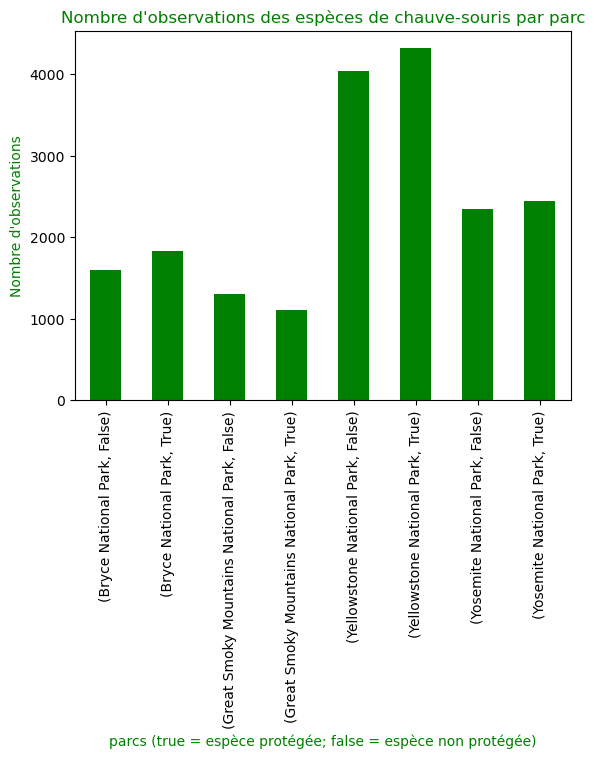

In [54]:
park_protected = df_bat_obs.groupby(['park_name','is_protected'])['observations'].sum()

park_protected.plot(kind="bar", stacked = True, color="green")
plt.xlabel("parcs (true = espèce protégée; false = espèce non protégée)", color="green")
plt.ylabel("Nombre d'observations",color="green")
plt.title("Nombre d'observations des espèces de chauve-souris par parc", color="green")

plt.show()

 <span style="color:green">
    On remarque aucune différence entre les parcs dans cet histogramme, la seule différence dans cette partie est le nombre d'observations. 

# Evaluation/Conclusions

Ce TP a permis d'analyser la composition en être vivants de 4 parcs nationaux. N'hésitez pas à porposer d'autres analyses.
Répondez de facon succinte aux questions suivantes:


- Quelle est la répartition des statuts de conservation des espèces ?

- Certains types d'espèces sont-ils plus susceptibles d'être menacés ?

- Les différences entre les espèces et leur statut de conservation sont-elles significatives ?

- Quel animal est le plus répandu et quelle est sa répartition dans les parcs ?



 <span style="color:green">
    1) Peu d'espèces protégées, parmis celles-ci presque la totalité sont préocupantes, très peu se rétablissent après qu'elles soient en danger d'extinction.

<span style="color:green">
2) Oui les mammifères sont particulièrement menacés, les oiseaux également. Les poissons et les amphibians n'urgent pas autant mais ne sont pas à négliger.

<span style="color:green">
3) Oui nous avons pu le voir grâce au test de X², notamment entre les mammifères, oiseaux et vascular plant.

<span style="color:green">
4) Nous avons trouvé que c'était la tourterelle turque pour ce qui est de l'espèce, avec 1785 observations dans les 4 parcs nationaux.  
    Cependant si on parle d'animal, grâce à votre nettoyage de common_names on a vu le grand nombre de redondances de Bat puis les observations d'espèces de chauves-souris à travers les parcs qui est énorme. 

Nous avons travaillé sur des données fictionnelles. Dans le prochain mini-projet, nous analyserons des données réelles issues d'un papier scientifique.

Prenez un peu de recul. Selon vous, quelles sont les difficultés que nous rencontrerons à travailler sur des données réelles ? 

<span style="color:green">
Être amené à travailler sur des données réelles peut apporter des difficultés sur la qualité des données, avec des erreurs ou des incohérences. De plus on aura potentiellement des données plus hétérogènes que celles-ci qui "n'étaient" que sur des parcs nationaux d'un même pays. Finalement, on aura peut-être un travail en plus sur la répartition des données. 